In [34]:
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [35]:
df =pd.read_csv("df_wd_total_copia.csv", index_col=0)

1.Calcula las siguientes estadísticas descriptivas para las variables numéricas:
Media
Mediana
Desviación estándar
Mínimo
Máximo

In [36]:
columnas_numericas =df.select_dtypes(include =["number"]).columns

In [37]:
columnas_numericas

Index(['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')

Utilizamos el describe porque nos aporta la media, mediana(50%), máximo, mínimo y desviación

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,3.567641e+02,1.982889e+03,2.000000e+00,3.550000e+01,8.900000e+01,2.165000e+02,2.633700e+04
agriculturalland,195.0,3.913487e+01,2.138664e+01,6.000000e-01,2.265000e+01,3.960000e+01,5.485000e+01,8.260000e+01
landarea,194.0,6.896244e+05,1.921609e+06,0.000000e+00,2.382825e+04,1.195110e+05,5.242560e+05,1.709824e+07
armedforcessize,171.0,1.592749e+05,3.806288e+05,0.000000e+00,1.100000e+04,3.100000e+04,1.420000e+05,3.031000e+06
birthrate,195.0,2.014528e+01,9.798615e+00,5.900000e+00,1.145000e+01,1.795000e+01,2.844500e+01,4.608000e+01
callingcode,195.0,3.600077e+02,3.224900e+02,1.000000e+00,8.300000e+01,2.555000e+02,5.065000e+02,1.876000e+03
co2-emissions,188.0,1.777992e+05,8.387903e+05,1.100000e+01,2.304250e+03,1.230300e+04,6.388425e+04,9.893038e+06
cpi,178.0,1.904610e+02,3.979474e+02,9.903000e+01,1.138850e+02,1.253400e+02,1.572650e+02,4.583710e+03
cpichange,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertilityrate,195.0,2.681872e+00,1.261755e+00,9.800000e-01,1.710000e+00,2.245000e+00,3.565000e+00,6.910000e+00


2 Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos

In [39]:
df[["density", "country"]].max()

density     26337.0
country    Zimbabwe
dtype: object

In [40]:
df[["population", "country"]].min()

population          836.0
country       Afghanistan
dtype: object

3.Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [41]:
media_paises =df["birthrate"].mean()
print(f"La media de la natalidad de los paises es: {np.round(media_paises, 2)}")

La media de la natalidad de los paises es: 20.15


4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [42]:
df[["infantmortality"]].describe().T

,count,mean,std,min,25%,50%,75%,max
infantmortality,189.0,21.332804,19.548058,1.4,6.0,14.0,32.7,84.5


In [43]:
percentile_25 = np.nanpercentile(df["infantmortality"], 25)
percentile_75 = np.nanpercentile(df["infantmortality"], 75)

print(f'El percentil 25 de la columna "age" es: {percentile_25_75[0]}')
print(f'El percentil 75 de la columna "age" es: {percentile_25_75[1]}')

El percentil 25 de la columna "age" es: 6.0
El percentil 75 de la columna "age" es: 32.7


In [44]:
def clasificacion(i):
    percentile_25 = np.nanpercentile(df["infantmortality"], 25)
    percentile_75 = np.nanpercentile(df["infantmortality"], 75)

    try:
        if i < percentile_25:
            return "Baja"
        elif percentile_25 <= i < percentile_75:
            return "Moderada"
        else:
            return "Alta"
    except:
        return "Unknown"

#originariamente teníamos un bucle for antes del except pero parece que no hace falta ya que 
# la función toma el argumento i, por lo que no es necesario iterar sobre la columna.

In [45]:
df["infantmortality_etiqueta"] =df["infantmortality"].apply(clasificacion)

In [47]:
df["infantmortality_etiqueta"].value_counts()

infantmortality_etiqueta
Moderada    94
Alta        54
Baja        47
Name: count, dtype: int64

In [48]:
df[["country","infantmortality_etiqueta"]]

,country,infantmortality_etiqueta
0,Afghanistan,Alta
1,Albania,Moderada
2,Algeria,Moderada
3,Andorra,Baja
4,Angola,Alta
...,...,...
190,Venezuela,Moderada
191,Vietnam,Moderada
192,Yemen,Alta
193,Zambia,Alta


5.Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [52]:
def identificar_linealidad (dataframe,combinacion_columnas):
    
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in combinacion_columnas: 
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion para ver si las variables son lineales o no y aplicar el método que mejor se adapte.

lineal, no_lineal = identificar_linealidad(df, [('fertilityrate', 'lifeexpectancy')])

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")


Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('fertilityrate', 'lifeexpectancy')]


In [57]:

correlation= spearmanr(df["fertilityrate"], df["lifeexpectancy"])
print("Correlación de Spearman entre fertilityrate y lifeexpectancy:", correlation)

#Esta correlación es negativa, es decir hay relación pero cuando una variable aumenta la otra disminuye.


Correlación de Spearman entre fertilityrate y lifeexpectancy: SignificanceResult(statistic=-0.8353803509301567, pvalue=4.7402735585417895e-52)


6.Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

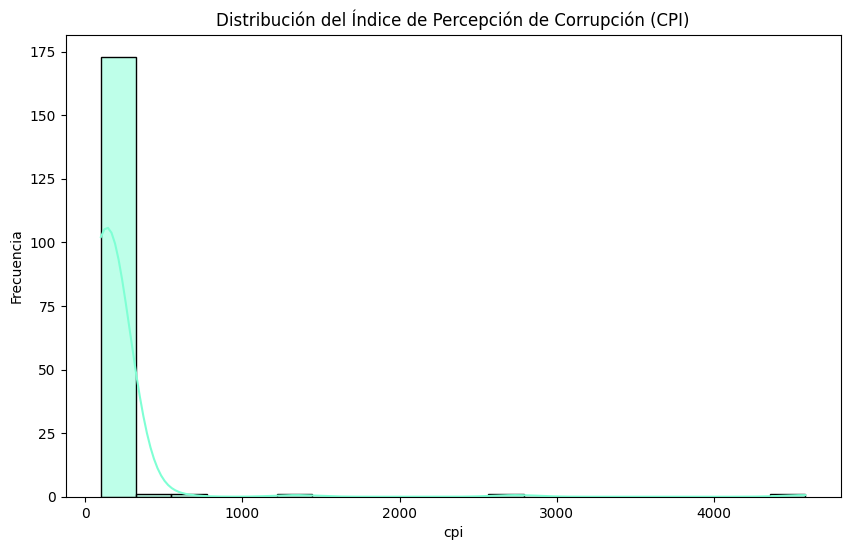

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df["cpi"].dropna(), bins=20, kde=True, color='aquamarine')
#dropna para eliminar los valores nan de la columna cpi (hay 17 valores nan)
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)')
plt.xlabel('cpi')
plt.ylabel('Frecuencia');


7.Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

8.Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [92]:
df_promedio_por_pais = df.groupby('country')['populationlaborforceparticipation'].mean().reset_index()
df_promedio_por_pais

,country,populationlaborforceparticipation
0,Afghanistan,48.90
1,Albania,55.70
2,Algeria,41.20
3,Andorra,62.45
4,Angola,77.50
...,...,...
190,Venezuela,59.70
191,Vietnam,77.40
192,Yemen,38.00
193,Zambia,74.60


9.Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas

In [80]:
df_correlaciones = df.corr(numeric_only = True, method = "spearman")

df_correlaciones

,density,agriculturalland,landarea,armedforcessize,birthrate,callingcode,co2-emissions,cpi,cpichange,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,lifeexpectancy,maternalmortalityratio,minimumwage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud
density,1.000000,0.147372,-0.579424,0.105384,-0.261107,-0.026299,-0.009172,-0.194308,-0.177130,-0.254869,-0.115015,0.166272,-0.006516,0.028644,0.022805,-0.172333,0.211272,-0.144929,0.106410,0.008887,0.084090,-0.085660,-0.058024,0.056559,-0.048854,-0.215339,-0.057839,0.137098,0.080083
agriculturalland,0.147372,1.000000,0.144767,0.162973,0.168414,-0.042598,0.074322,0.230465,0.231436,0.160531,-0.384844,0.022820,0.079518,-0.060650,-0.127699,0.197423,-0.215144,0.144910,-0.189257,0.103314,-0.079600,0.271199,-0.157066,-0.057405,0.158840,0.055267,0.232545,0.006225,-0.011380
landarea,-0.579424,0.144767,1.000000,0.575037,0.259924,-0.284213,0.584187,0.401461,0.333871,0.241362,-0.136160,-0.305351,0.583055,0.000739,0.017603,0.216256,-0.188076,0.196945,-0.196361,0.217502,-0.122541,0.813623,-0.011433,-0.394373,0.245582,0.045625,0.776581,-0.050020,0.056931
armedforcessize,0.105384,0.162973,0.575037,1.000000,-0.141813,-0.261176,0.735598,0.138153,0.119756,-0.122133,-0.131597,-0.220918,0.707670,0.019564,0.272653,-0.114122,0.157792,-0.130084,0.086141,0.247042,0.141343,0.818154,-0.104007,-0.260803,0.187224,-0.089815,0.828893,0.156043,0.257734
birthrate,-0.261107,0.168414,0.259924,-0.141813,1.000000,0.162260,-0.418355,0.400977,0.237546,0.973552,-0.083542,-0.298090,-0.406352,0.062770,-0.766128,0.895200,-0.845522,0.856945,-0.657015,0.239035,-0.845295,0.133268,0.198997,-0.370934,0.168458,-0.055770,-0.009899,-0.581999,0.041312
callingcode,-0.026299,-0.042598,-0.284213,-0.261176,0.162260,1.000000,-0.277268,0.087829,-0.016856,0.160455,-0.080934,-0.138525,-0.356442,-0.068676,-0.213008,0.106171,-0.145160,0.051555,-0.151760,-0.055086,-0.074278,-0.343347,0.077096,0.021825,-0.334636,-0.091476,-0.354691,-0.042181,0.303856
co2-emissions,-0.009172,0.074322,0.584187,0.735598,-0.418355,-0.277268,1.000000,0.061246,0.047506,-0.404570,-0.193107,-0.212745,0.948399,-0.038222,0.527387,-0.447768,0.453992,-0.499279,0.307173,0.040436,0.490246,0.728088,-0.171476,-0.186106,0.035439,-0.050298,0.834269,0.388038,0.128445
cpi,-0.194308,0.230465,0.401461,0.138153,0.400977,0.087829,0.061246,1.000000,0.813991,0.372278,-0.088203,-0.339825,0.008133,0.098795,-0.273592,0.433978,-0.435394,0.431473,-0.488853,0.216103,-0.294789,0.337583,0.026939,-0.318406,0.102826,0.057266,0.256383,-0.269893,0.156215
cpichange,-0.177130,0.231436,0.333871,0.119756,0.237546,-0.016856,0.047506,0.813991,1.000000,0.216461,-0.032577,-0.146713,0.020980,0.043075,-0.171739,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.261089,-0.050647,-0.223032,0.095983,0.159493,0.212148,-0.103175,0.034444
fertilityrate,-0.254869,0.160531,0.241362,-0.122133,0.973552,0.160455,-0.404570,0.372278,0.216461,1.000000,-0.069000,-0.271034,-0.405568,0.048688,-0.743367,0.862218,-0.835380,0.830900,-0.598073,0.179680,-0.810827,0.110225,0.179108,-0.368122,0.171121,-0.071483,-0.024275,-0.566365,0.036192


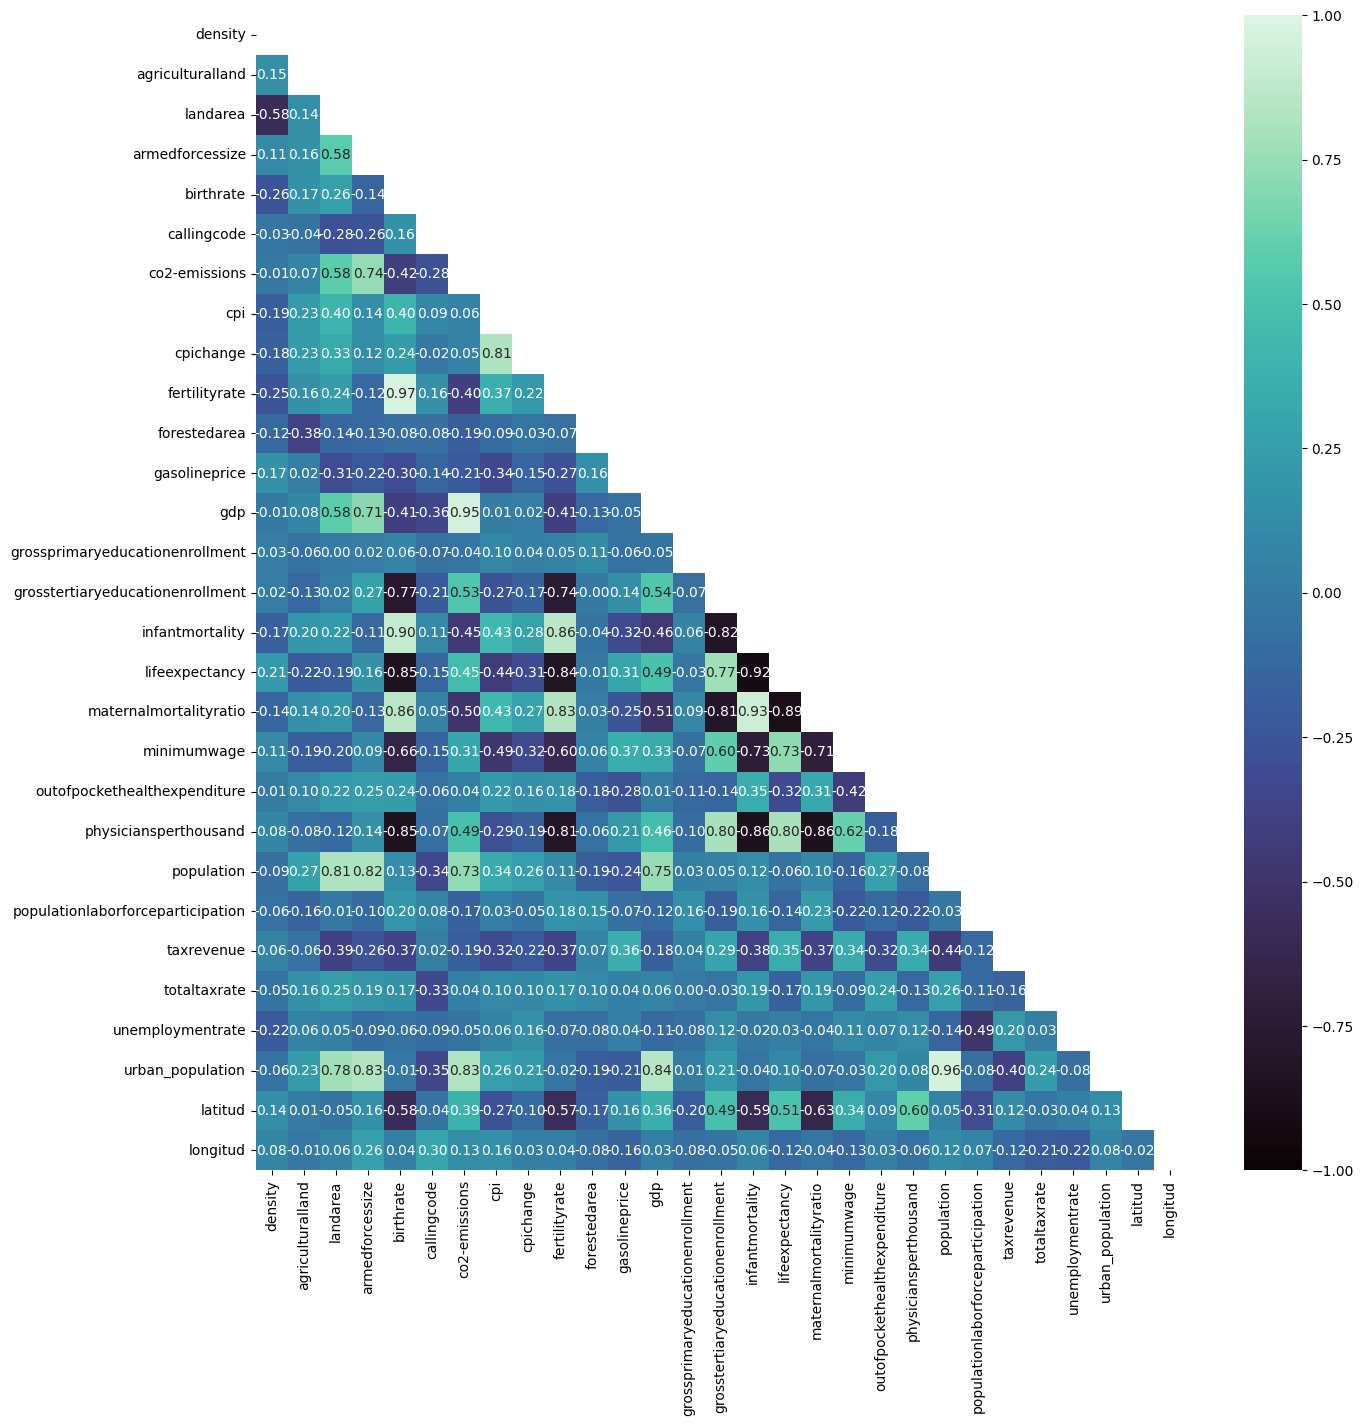

In [85]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

# en general hay una correlación débil a moderada en el conjunto de variables de la table. 
# En algunos casos existen correlaciones altas p.ej esperanza de vida y mortalidad infantil.
